In [3]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler

In [4]:
#Load the dataset
data=pd.read_csv('customer_data_records.csv')
#Display the first few rows of the dataset
print(data.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [5]:
#Extract relevant features for clustering
X=data.iloc[:,[1,2]].values#Sect columns 1 and 2 as 'Annual Income'and 'Spending Score' for all rows


In [9]:
#Feature scaling-is important before clustering
scaler=StandardScaler()#Create a StandardScaler object
X_scaled=scaler.fit_transform(X)#Standardize the features to have mean=0 and variance=1

In [11]:
#Determine the optimal number of clusters using the elbow method
wcss=[]#List to store the within-cluster sum of squares
for i in range(1, 11):#Loop through 1 to 10 clusters
    kmeans=cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)#Create KMeans object
    kmeans.fit(X_scaled)#Fit the model to the scaled data
    wcss.append(kmeans.inertia_)#Append the inertia (WCSS) to the list

Text(0.5, 1.0, 'Elbow Method for Optimal Clusters')

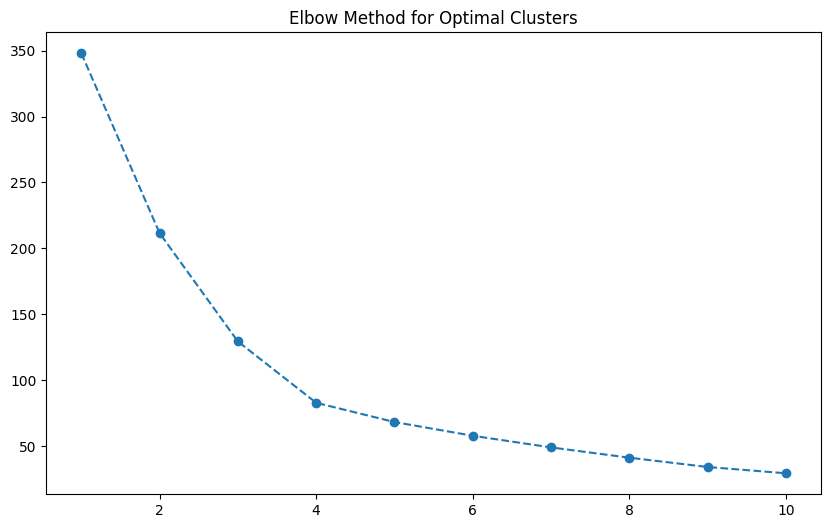

In [12]:
#plot the elbow method graph
plt.figure(figsize=(10, 6))#Set the figure size
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')#Plot WCSS against number of clusters
plt.title('Elbow Method for Optimal Clusters')#Set the title of the plot

In [13]:
#Base on the elbow method,lets assume the optimal number of clusters is 5
optimal_clusters = 5#Lets say we determined 5 as the optimal number of clusters from the elbow method
#pply KMeans clustering with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)#Create KMeans object with optimal clusters
kmeans.fit(X_scaled)#Fit the model to the scaled data

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [14]:
#Apply the K-means with the optimal number of clusters
kmeans = cluster.KMeans(n_clusters=optimal_clusters,random_state=42)#Create KMeans object with optimal clusters
y_kmeans = kmeans.fit_predict(X_scaled)#Predict the cluster labels for each data point

In [16]:
#Add cluster labels to the original dataset
data['Cluster'] = y_kmeans#Create a new column 'Cluster' in the dataset with the predicted cluster labels

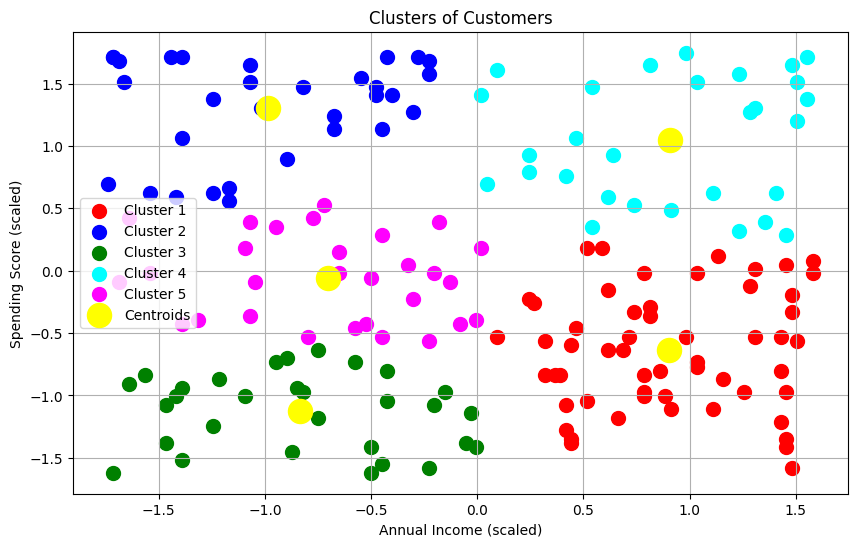

In [17]:
#visualize the clusters
plt.figure(figsize=(10, 6))#Set the figure size
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')#Plot points in cluster 1
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')#Plot points in cluster 2
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')#Plot points in cluster 3
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')#Plot points in cluster 4
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')#Plot points in cluster 5
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')#Plot the centroids  
plt.title('Clusters of Customers')#Set the title of the plot
plt.xlabel('Annual Income (scaled)')#Set the x-axis label
plt.ylabel('Spending Score (scaled)')#Set the y-axis label
plt.grid(True)#Add grid lines to the plot
plt.legend()#Show the legend

In [ ]:
#Plot each cluster with different colors
for i in range(optimal_clusters):
    plt.scatter(X_scaled[y_kmeans == cluster,0],#Annual Income
                X_scaled[y_kmeans == cluster, 1],#Spending Score 
                s=100,#Marker size
                )
plt.title('Clusters of Customers')#Set the title of the plot
plt.xlabel('Annual Income (scaled)')#Set the x-axis label
plt.ylabel('Spending Score (scaled)')#Set the y-axis label
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')#Plot the centroids  
plt.legend()#Show the legend
plt.show()#Display the plot
    